In [ ]:
# TASK 
#  1. Visualize the sentiment distribution (positive, neutral, negative) of user reviews using a stacked bar chart, segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5 stars). Include only apps with more than 1,000 reviews and group by the top 5 categories.

In [3]:
#Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Dataset


reviews_df = pd.read_csv(r"E:\NULLCLASS\User Reviews.csv")
apps_df = pd.read_csv(r"E:\NULLCLASS\Play Store Data.csv")


In [5]:
#Data Cleaning & Preprocessing


# Remove missing values in relevant columns
reviews_df.dropna(subset=['Sentiment', 'App'], inplace=True)
apps_df.dropna(subset=['Category', 'Reviews', 'Rating'], inplace=True)

# Convert 'Reviews' column to numeric format (handling 'M' properly)
apps_df['Reviews'] = apps_df['Reviews'].replace({'M': '*1e6'}, regex=True).map(pd.eval).astype(int)


In [6]:
 # Filter Data for Analysis

# Filter apps with more than 1,000 reviews
filtered_apps = apps_df[apps_df['Reviews'] > 1000]

# Get the top 5 categories based on app count
top_categories = filtered_apps['Category'].value_counts().head(5).index

# Keep only apps in the top 5 categories
filtered_apps = filtered_apps[filtered_apps['Category'].isin(top_categories)]


In [7]:
# Merge App Data with User Reviews

# Merge user reviews with app information
merged_df = pd.merge(reviews_df, filtered_apps[['App', 'Category', 'Rating']], on='App', how='inner')


In [8]:
#  Create Rating Groups

# Function to classify rating groups
def classify_rating(rating):
    if rating <= 2.0:
        return '1-2 stars'
    elif rating <= 4.0:
        return '3-4 stars'
    else:
        return '4-5 stars'

# Apply rating classification
merged_df['Rating Group'] = merged_df['Rating'].apply(classify_rating)


In [9]:
#  Compute Sentiment Distribution

# Aggregate sentiment distribution per rating group
sentiment_counts = merged_df.groupby(['Category', 'Rating Group', 'Sentiment']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

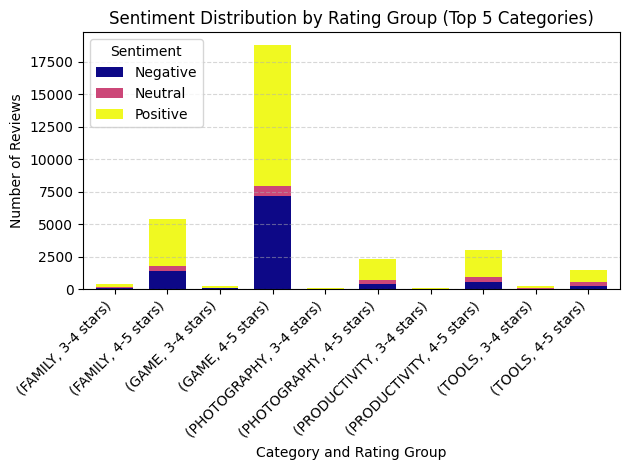

In [10]:
# Plot Stacked Bar Chart

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
sentiment_counts.plot(kind='bar', stacked=True, colormap='plasma', width=0.7)

# Customize the plot
plt.title('Sentiment Distribution by Rating Group (Top 5 Categories)')
plt.xlabel('Category and Rating Group')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
